# Penrose Limits, the Colliding Plane Wave Problem and the Classical String Backgrounds by Feinstein 
##  Geoff Cope
##  University of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 25, 2021  Christmas Day AND the launch of JWST!

Here we work with metric 4.  From paper: "Any 4-dimensional spacetime with two orthogonal Killing directions can be put into the above form ( metric4 )".  The field equations for metric 4 are given as the wave equation for G in null coordinates.  Full solution we be to first solve the wave equation for G which would consist of the sum of left and right moving arbitary profiles. Once G is found take appropriate derivatives and then plug into the wave equation for p, then solve.  Now having G and p, take appropriate derivatives and plug into wave equatioin for f and solve. 

https://arxiv.org/abs/hep-th/0206052

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,dy,du,dv,dx,dy = symbols( 'u v x y du dv dx dy' , positive = True, real = True  ) 

In [4]:
G = Function('G')(u,v)
G

In [5]:
f = Function('f')(u,v)
f

In [6]:
p = Function('p')(u,v)
p

In [7]:
variables = Matrix( [u,v,x,y] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [8]:
differentials = Matrix( [du,dv,dx,dy])
differentials 

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [10]:
lineElement = expand(-f*du*dv + G * ( exp(p)*dx**2 + exp(-p)*dy**2 ))
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡           -f(u, v)                                      ⎤
⎢    0      ─────────         0                  0        ⎥
⎢               2                                         ⎥
⎢                                                         ⎥
⎢-f(u, v)                                                 ⎥
⎢─────────      0             0                  0        ⎥
⎢    2                                                    ⎥
⎢                                                         ⎥
⎢                               p(u, v)                   ⎥
⎢    0          0      G(u, v)⋅ℯ                 0        ⎥
⎢                                                         ⎥
⎢                                                 -p(u, v)⎥
⎣    0          0             0          G(u, v)⋅ℯ        ⎦

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡           -f(u, v)                                      ⎤
⎢    0      ─────────         0                  0        ⎥
⎢               2                                         ⎥
⎢                                                         ⎥
⎢-f(u, v)                                                 ⎥
⎢─────────      0             0                  0        ⎥
⎢    2                                                    ⎥
⎢                                                         ⎥
⎢                               p(u, v)                   ⎥
⎢    0          0      G(u, v)⋅ℯ                 0        ⎥
⎢                                                         ⎥
⎢                                                 -p(u, v)⎥
⎣    0          0             0          G(u, v)⋅ℯ        ⎦

In [14]:
from einsteinpy.symbolic import *

In [15]:
syms = sympy.symbols("u v x y"  , positive = True, real = True)
u,v,x,y = syms

In [16]:
metric = MetricTensor(m,syms)

In [17]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂                                                                                         
⎢⎢──(f(u, v))                                                                               
⎢⎢∂u                                                                                        
⎢⎢───────────  0                       0                                               0    
⎢⎢  f(u, v)                                                                                 
⎢⎢                                                                                          
⎢⎢     0       0                       0                                               0    
⎢⎢                                                                                          
⎢⎢                ⎛        ∂             ∂          ⎞  p(u, v)                              
⎢⎢                ⎜G(u, v)⋅──(p(u, v)) + ──(G(u, v))⎟⋅ℯ                                     
⎢⎢                ⎝        ∂v            ∂v         ⎠                 

In [18]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                       2                                                   
⎢                                 2    ∂                                                    
⎢                    ⎛∂          ⎞    ───(G(u, v))   ∂           ∂             ⎛∂          ⎞
⎢                    ⎜──(p(u, v))⎟      2            ──(G(u, v))⋅──(f(u, v))   ⎜──(G(u, v))⎟
⎢                    ⎝∂u         ⎠    ∂u             ∂u          ∂u            ⎝∂u         ⎠
⎢                  - ────────────── - ──────────── + ─────────────────────── + ─────────────
⎢                          2            G(u, v)          G(u, v)⋅f(u, v)            2       
⎢                                                                                2⋅G (u, v) 
⎢                                                                                           
⎢                                                                                           
⎢                               2                                     

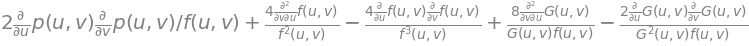

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                        ⎛∂ 
⎢                                                                                        ⎜──
⎢                                                                                        ⎝∂u
⎢                                                                                      - ───
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢     ⎛                                 2                             

In [21]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [22]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [23]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                       2                                                   
⎢                                 2    ∂                                                    
⎢                    ⎛∂          ⎞    ───(G(u, v))   ∂           ∂             ⎛∂          ⎞
⎢                    ⎜──(p(u, v))⎟      2            ──(G(u, v))⋅──(f(u, v))   ⎜──(G(u, v))⎟
⎢                    ⎝∂u         ⎠    ∂u             ∂u          ∂u            ⎝∂u         ⎠
⎢                  - ────────────── - ──────────── + ─────────────────────── + ─────────────
⎢                          2            G(u, v)          G(u, v)⋅f(u, v)            2       
⎢                                                                                2⋅G (u, v) 
⎢                                                                                           
⎢                                                                                           
⎢                               2                                     

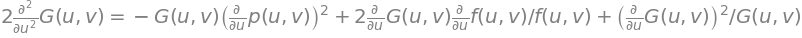

In [26]:
Eq(2*diff(G,u,u),2*solve( ricciSimplified[0,0], diff(G,u,u) )[0])

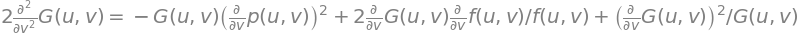

In [27]:
Eq(2*diff(G,v,v),2*solve( ricciSimplified[1,1], diff(G,v,v) )[0])

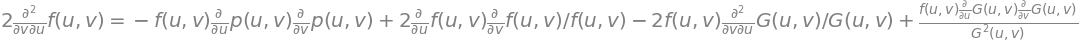

In [56]:
waveEquationF = Eq(2*diff(f,u,v),2*solve( ricciSimplified[0,1], diff(f,u,v) )[0])
waveEquationF

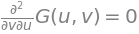

In [54]:
waveEquationG = Eq(( ricciSimplified[2,2].args[1] + ricciSimplified[3,3].args[1]).args[1],0)
waveEquationG

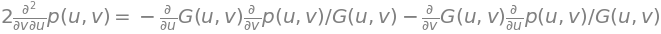

In [55]:
waveEquationP = Eq(2*diff(p,u,v),expand(2*solve( ricciSimplified[2,2].args[1] - ricciSimplified[3,3].args[1] , diff(p,u,v) )[0]) )
waveEquationP

In [58]:
vacuumFieldEquations = Matrix([waveEquationG ,waveEquationP,waveEquationF ])
vacuumFieldEquations

⎡                                                                2                          
⎢                                                               ∂                           
⎢                                                             ─────(G(u, v)) = 0            
⎢                                                             ∂v ∂u                         
⎢                                                                                           
⎢                                                        ∂           ∂             ∂        
⎢                                        2               ──(G(u, v))⋅──(p(u, v))   ──(G(u, v
⎢                                       ∂                ∂u          ∂v            ∂v       
⎢                                   2⋅─────(p(u, v)) = - ─────────────────────── - ─────────
⎢                                     ∂v ∂u                      G(u, v)                   G
⎢                                                                     